Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [ ] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?


## Importing

In [2]:
import pandas as pd 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd C:\\Users\\Hakuj\\Documents\\DataSets\\Mario-Maker

C:\Users\Hakuj\Documents\DataSets\Mario-Maker


In [4]:
clears = pd.read_csv('clears.csv', sep='\t',index_col=0,parse_dates=True)
course_meta = pd.read_csv('course-meta.csv',sep='\t', index_col=0,parse_dates=True)
courses = pd.read_csv('courses.csv',sep='\t')
likes = pd.read_csv('likes.csv', sep='\t',index_col=0,parse_dates=True)
players = pd.read_csv('players.csv', sep='\t')
plays = pd.read_csv('plays.csv',sep='\t',index_col=0,parse_dates=True, )
records = pd.read_csv('records.csv', sep='\t',index_col=0,parse_dates=True)

## Target Selection
- I want to forcast stars (likes) over time.
- However, the actual 'likes' csv is useless to me. It doesn't capture everything.
  - Which is sad because I was hoping to do more over time predictions, now I'll have to see if I can infer them from other features.

In [5]:
courses[courses['id'] == 'DE4D-0000-035D-3AE1']

,id,difficulty,gameStyle,maker,title,thumbnail,image,creation
16866,DE4D-0000-035D-3AE1,superExpert,marioBros,gizgaz,[2YMM] Spiny Side Down,https://dypqnhofrd2x2.cloudfront.net/DE4D-0000...,https://dypqnhofrd2x2.cloudfront.net/DE4D-0000...,2017-09-12 00:00:00


In [6]:
likes

,id,player
catch,,
2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell
2018-03-02 09:46:27.847,0000-0000-035A-9F14,jlan6e
2017-12-18 14:47:47.489,0001-0000-0347-486A,cat38690
2017-12-18 14:47:47.489,0001-0000-0347-486A,raulcaba
2017-12-18 14:47:48.878,0001-0000-0359-B3CD,Tugaeddy
2018-02-23 15:22:45.931,0002-0000-0328-E374,Jahooli4
2018-02-23 15:22:45.931,0002-0000-0328-E374,kidfury777
2018-02-23 15:22:45.931,0002-0000-0328-E374,Thomasleboss80
2018-02-23 15:22:47.430,0002-0000-034F-8AF4,feather07


In [46]:
likes = likes.sort_values('id')
likes['like'] = [1]*len(likes)
clears['clear'] = [1]*len(clears)

In [8]:
course_meta[course_meta['id'] == 'DE4D-0000-035D-3AE1'].sort_values('catch')

,id,firstClear,tag,stars,players,tweets,clears,attempts,clearRate
catch,,,,,,,,,
2017-12-18 15:32:52.737,DE4D-0000-035D-3AE1,Kiavik,Autoscroll,2969,18747,0,4994,335287,1.48
2017-12-19 14:53:01.062,DE4D-0000-035D-3AE1,Kiavik,Autoscroll,2974,18774,0,5004,335949,1.48
2017-12-19 16:38:46.103,DE4D-0000-035D-3AE1,Kiavik,Autoscroll,2974,18775,0,5005,335967,1.48
2017-12-19 18:10:34.185,DE4D-0000-035D-3AE1,Kiavik,Autoscroll,2974,18776,0,5005,335976,1.48
2017-12-19 19:42:33.941,DE4D-0000-035D-3AE1,Kiavik,Autoscroll,2975,18781,0,5006,336100,1.48
2017-12-19 21:15:28.194,DE4D-0000-035D-3AE1,Kiavik,Autoscroll,2975,18784,0,5008,336148,1.48
2017-12-19 22:48:03.217,DE4D-0000-035D-3AE1,Kiavik,Autoscroll,2975,18788,0,5008,336198,1.48
2017-12-20 00:20:36.867,DE4D-0000-035D-3AE1,Kiavik,Autoscroll,2976,18789,0,5008,336229,1.48
2017-12-20 01:53:51.806,DE4D-0000-035D-3AE1,Kiavik,Autoscroll,2977,18791,0,5009,336234,1.48


In [9]:
course_meta.sort_values('stars').tail()

,id,firstClear,tag,stars,players,tweets,clears,attempts,clearRate
catch,,,,,,,,,
2018-03-13 23:43:43.088,140E-0000-0321-38D6,geniusmg,Puzzle,5369,30074,0,14604,100455,14.53
2018-03-13 22:13:30.453,140E-0000-0321-38D6,geniusmg,Puzzle,5369,30072,0,14603,100447,14.53
2018-03-13 19:59:53.239,140E-0000-0321-38D6,geniusmg,Puzzle,5369,30068,0,14600,100431,14.53
2018-03-13 16:56:59.610,140E-0000-0321-38D6,geniusmg,Puzzle,5369,30066,0,14600,100417,14.53
2018-03-13 17:43:02.888,140E-0000-0321-38D6,geniusmg,Puzzle,5369,30067,0,14600,100420,14.53


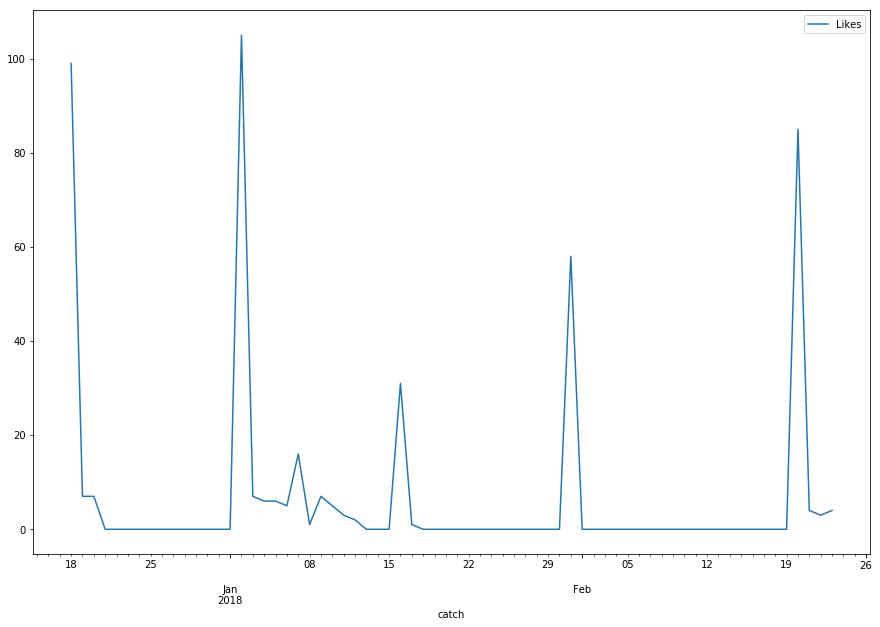

In [10]:
likes[likes['id'] =='DE4D-0000-035D-3AE1']['like'].resample(
    rule='d').sum().plot(legend=True, label='Likes', figsize=(15,10))
# course_meta[course_meta['id']=='DE4D-0000-035D-3AE1']['stars'].resample(
#     rule='d').sum().plot(legend=True, label='stars', figsize=(15,10),logy=True);

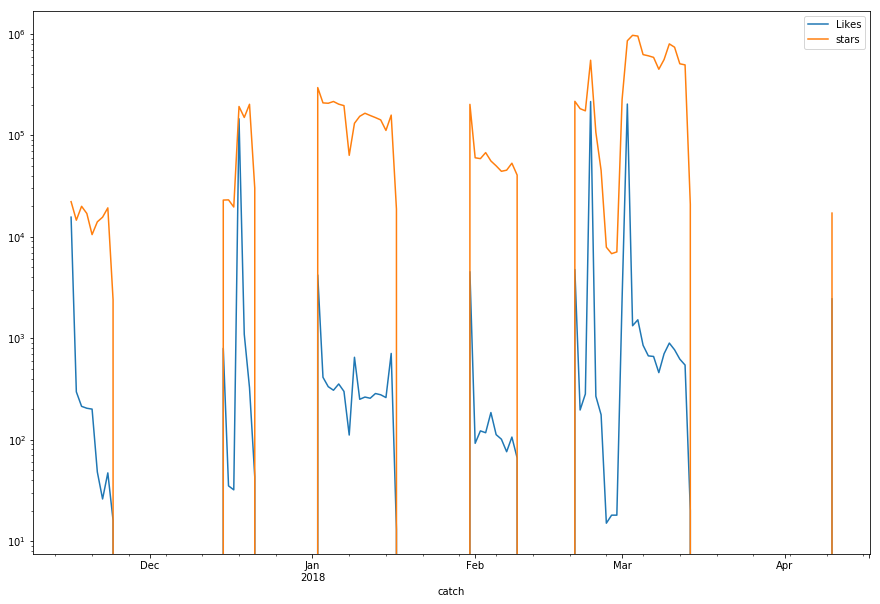

In [11]:
likes['like'].resample(
    rule='d').sum().plot(legend=True, label='Likes', figsize=(15,10));
course_meta['stars'].resample(
    rule='d').sum().plot(legend=True, label='stars', figsize=(15,10),logy=True);

## Feature selection
- Most things are time stamped and I want to forcast, so I'll have to be extra careful with my features
- My intuitions are that some very few players will have a bit of weight but that the vast majority will not
  - This comes from the idea of people will want to play the levels they see streamers play.

 

In [12]:
course_meta_players = pd.merge(course_meta, players, right_on='id', left_on='firstClear')
# Looses the 'Catch', because were merging and just pulling the info from the player based 
#on the first clear of the course

## Looking at Prophet

In [47]:
likes.resample(rule='d').sum()

,like
catch,
2017-11-16,15635
2017-11-17,296
2017-11-18,213
2017-11-19,204
2017-11-20,200
2017-11-21,48
2017-11-22,26
2017-11-23,47
2017-11-24,16


In [48]:
clears.resample(rule='d').sum()

,clear
catch,
2017-11-16,37252
2017-11-17,765
2017-11-18,565
2017-11-19,528
2017-11-20,741
2017-11-21,210
2017-11-22,116
2017-11-23,136
2017-11-24,30


In [36]:
#Takes likes and sums up all likes for the day and drops all the days that were not available
#Then resets the index, renames columns and casts to new df
likes_condensed = likes.resample(
    rule='d').sum()[likes.resample(
    rule='d').sum()['like'] != 0].reset_index(
).rename(
    columns={
        'catch': 'ds',
        'like':'y'
    })
likes_condensed

,ds,y
0,2017-11-16,15635
1,2017-11-17,296
2,2017-11-18,213
3,2017-11-19,204
4,2017-11-20,200
5,2017-11-21,48
6,2017-11-22,26
7,2017-11-23,47
8,2017-11-24,16
9,2017-12-15,794


In [14]:
import plotly.express as px

In [15]:
from fbprophet import Prophet

In [38]:
model = Prophet()

In [39]:
model.fit(likes_cosdensed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = model.make_future_dataframe(periods=30)
future

,ds
0,2017-11-16
1,2017-11-17
2,2017-11-18
3,2017-11-19
4,2017-11-20
5,2017-11-21
6,2017-11-22
7,2017-11-23
8,2017-11-24
9,2017-12-15


In [41]:
forecast = model.predict(future)

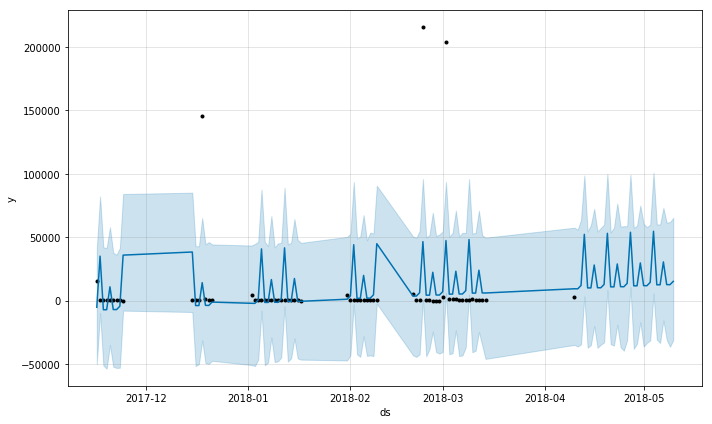

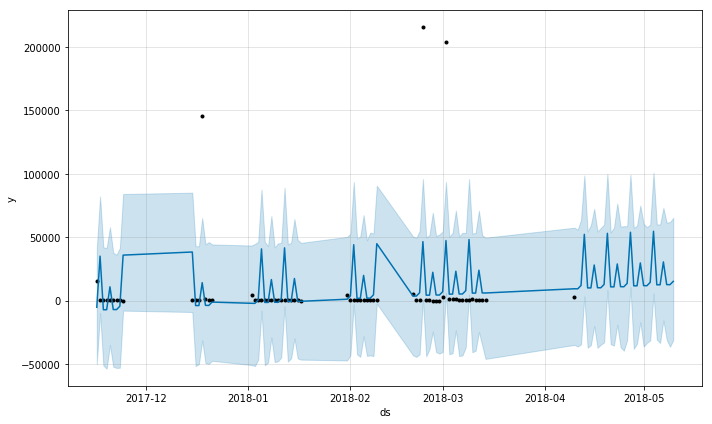

In [44]:
model.plot(forecast)

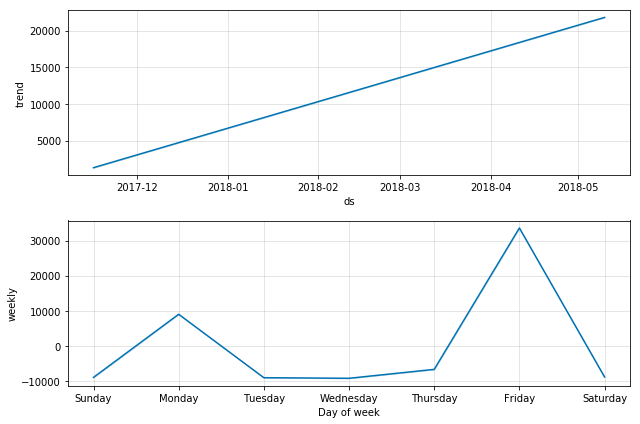

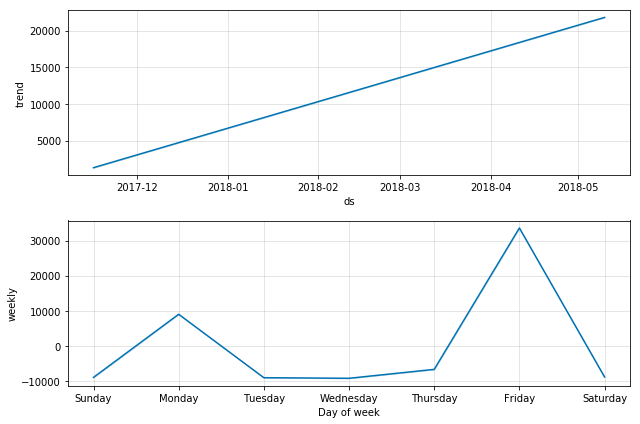

In [42]:
model.plot_components(forecast)

## Looking deeper at the dataframes.
- I'm worried I may not actually be able to use this data as there are large gaps in the dates 
- So I'm looking to see if maybe I can do something else, or if I will need to pick something else.
- bleh

In [ ]:
cou